In [7]:
import numpy as np
import tensorflow as tf
import random

seed = 101
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "/kaggle/input/skin-disease-data/skin_disease_data/train"

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="sparse",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="sparse",
    subset="validation"
)


Found 8015 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.


In [10]:
!find /kaggle/input/skin-disease-data -maxdepth 3


/kaggle/input/skin-disease-data
/kaggle/input/skin-disease-data/skin_disease_data
/kaggle/input/skin-disease-data/skin_disease_data/train
/kaggle/input/skin-disease-data/skin_disease_data/train/MEL
/kaggle/input/skin-disease-data/skin_disease_data/train/VASC
/kaggle/input/skin-disease-data/skin_disease_data/train/DF
/kaggle/input/skin-disease-data/skin_disease_data/train/NV
/kaggle/input/skin-disease-data/skin_disease_data/train/BKL
/kaggle/input/skin-disease-data/skin_disease_data/train/AKIEC
/kaggle/input/skin-disease-data/skin_disease_data/train/BCC


In [11]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
preds = Dense(7, activation="softmax")(x)

model = Model(base_model.input, preds)


In [12]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [13]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1768507872.124877     132 service.cc:152] XLA service 0x7db49418c130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768507872.124936     132 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1768507872.124942     132 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1768507876.334378     132 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-15 20:11:26.289942: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 20:11:26.426551: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1768507905.316324     132 device_co

  8/251 ━━━━━━━━━━━━━━━━━━━━ 1:27 359ms/step - accuracy: 0.1937 - loss: 2.7013

2026-01-15 20:12:02.661240: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 20:12:02.807318: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 20:12:02.945037: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.5098 - loss: 1.5307

2026-01-15 20:14:19.951042: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 20:14:20.088588: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


251/251 ━━━━━━━━━━━━━━━━━━━━ 215s 618ms/step - accuracy: 0.5103 - loss: 1.5292 - val_accuracy: 0.6705 - val_loss: 3.0316
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 287ms/step - accuracy: 0.7810 - loss: 0.6356 - val_accuracy: 0.6735 - val_loss: 2.3203
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 73s 290ms/step - accuracy: 0.8570 - loss: 0.4102 - val_accuracy: 0.6875 - val_loss: 1.7282
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 286ms/step - accuracy: 0.9018 - loss: 0.2715 - val_accuracy: 0.7035 - val_loss: 1.7309
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 285ms/step - accuracy: 0.9374 - loss: 0.1757 - val_accuracy: 0.7590 - val_loss: 1.2104
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 288ms/step - accuracy: 0.9600 - loss: 0.1151 - val_accuracy: 0.7700 - val_loss: 1.2326
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 287ms/step - accuracy: 0.9675 - loss: 0.0940 - val_accuracy: 0.7900 - val_loss: 1.0286
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 287ms/step - accuracy: 0.9738 - loss: 0.0834 - va

In [14]:
base_model.trainable = True

for layer in base_model.layers[:int(len(base_model.layers)*0.7)]:
    layer.trainable = False

model.compile(
    optimizer=Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [15]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.9883 - loss: 0.0341 - val_accuracy: 0.8325 - val_loss: 0.9421
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 288ms/step - accuracy: 0.9957 - loss: 0.0174 - val_accuracy: 0.8330 - val_loss: 0.9262
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 286ms/step - accuracy: 0.9979 - loss: 0.0107 - val_accuracy: 0.8370 - val_loss: 0.8794
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 280ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.8375 - val_loss: 0.8211
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 279ms/step - accuracy: 0.9988 - loss: 0.0072 - val_accuracy: 0.8365 - val_loss: 0.8932
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 71s 284ms/step - accuracy: 0.9993 - loss: 0.0055 - val_accuracy: 0.8370 - val_loss: 0.8961
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 278ms/step - accuracy: 0.9984 - loss: 0.0060 - val_accuracy: 0.8400 - val_loss: 0.8790
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 278ms/step - accuracy: 0.9993 - loss: 

63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step
              precision    recall  f1-score   support

       AKIEC     0.0143    0.0154    0.0148        65
         BCC     0.0187    0.0196    0.0191       102
         BKL     0.1042    0.0913    0.0973       219
          DF     0.0000    0.0000    0.0000        23
         MEL     0.1313    0.0946    0.1099       222
          NV     0.6704    0.7114    0.6903      1341
        VASC     0.0000    0.0000    0.0000        28

    accuracy                         0.4990      2000
   macro avg     0.1341    0.1332    0.1331      2000
weighted avg     0.4769    0.4990    0.4872      2000



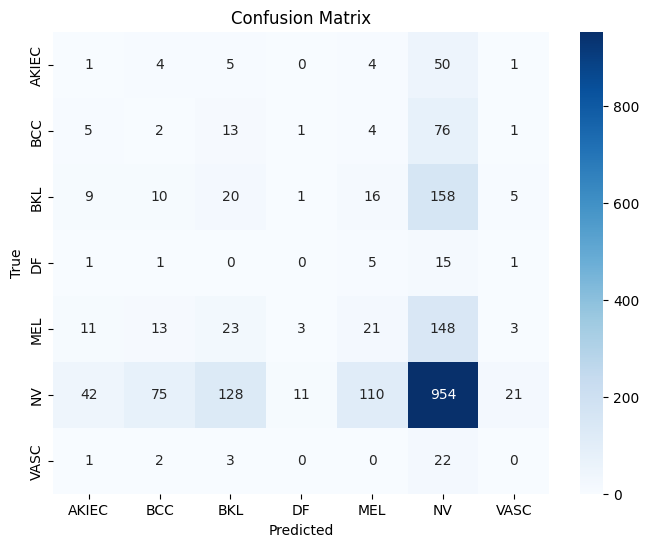

In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
val_generator.reset()
pred_probs = model.predict(val_generator, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# ---- Classification report ----
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# ---- Confusion matrix ----
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


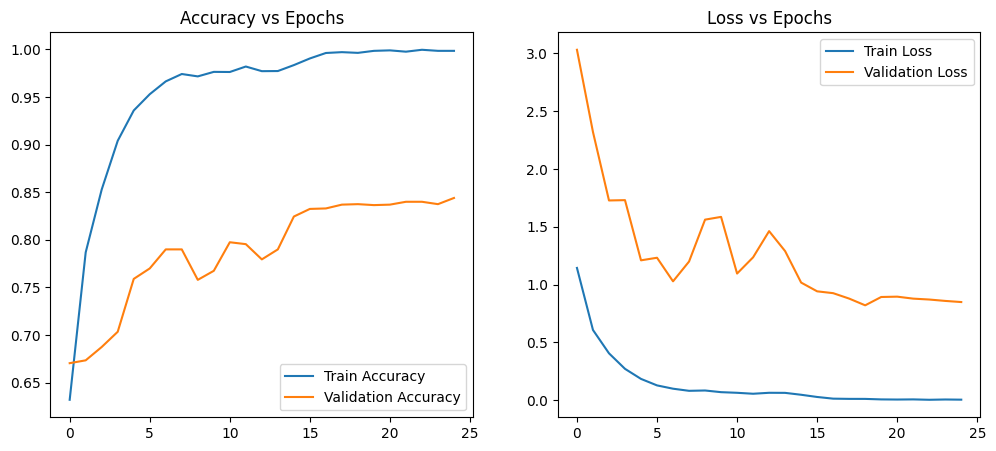

In [17]:
import matplotlib.pyplot as plt

# Combine stage-1 and stage-2 histories
acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']

loss = history.history['loss'] + history_finetune.history['loss']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")

# Loss
plt.subplot(1,2,2)
plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss vs Epochs")

plt.show()


In [18]:
model.save("/kaggle/working/skin_mobilenetv2.h5")
